In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
from collections import defaultdict
import random
from shutil import copy, copytree, rmtree
from pathlib import Path
import urllib
import matplotlib.image as image
from sklearn import preprocessing
import cv2

import tensorflow as tf

In [3]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [4]:
!unzip '/content/drive/MyDrive/Food-101/food-101.zip'
!ls food-101/

Streaming output truncated to the last 5000 lines.
  inflating: food-101/images/tacos/1059239.jpg  
  inflating: food-101/images/tacos/1059326.jpg  
  inflating: food-101/images/tacos/1066762.jpg  
  inflating: food-101/images/tacos/1070967.jpg  
  inflating: food-101/images/tacos/1073468.jpg  
  inflating: food-101/images/tacos/1075296.jpg  
  inflating: food-101/images/tacos/1085243.jpg  
  inflating: food-101/images/tacos/108529.jpg  
  inflating: food-101/images/tacos/1086014.jpg  
  inflating: food-101/images/tacos/108945.jpg  
  inflating: food-101/images/tacos/1089575.jpg  
  inflating: food-101/images/tacos/1091159.jpg  
  inflating: food-101/images/tacos/1101369.jpg  
  inflating: food-101/images/tacos/1109058.jpg  
  inflating: food-101/images/tacos/1109744.jpg  
  inflating: food-101/images/tacos/1119371.jpg  
  inflating: food-101/images/tacos/1123766.jpg  
  inflating: food-101/images/tacos/1124625.jpg  
  inflating: food-101/images/tacos/1130893.jpg  
  inflating: food-10

In [5]:
root_dir = './food-101'
input_root_path = Path(root_dir)
img_dir_path = input_root_path/'images'

In [6]:
!cat {root_dir}/README.txt

Readme

Structure:
----------
    images/
        <class_name>/
            <image_id>.jpg
    meta/
        classes.txt
        labels.txt
        test.json
        test.txt
        train.json
        train.txt

All images can be found in the "images" folder and are organized per class.

The test/train splitting can be found in the "meta" directory.



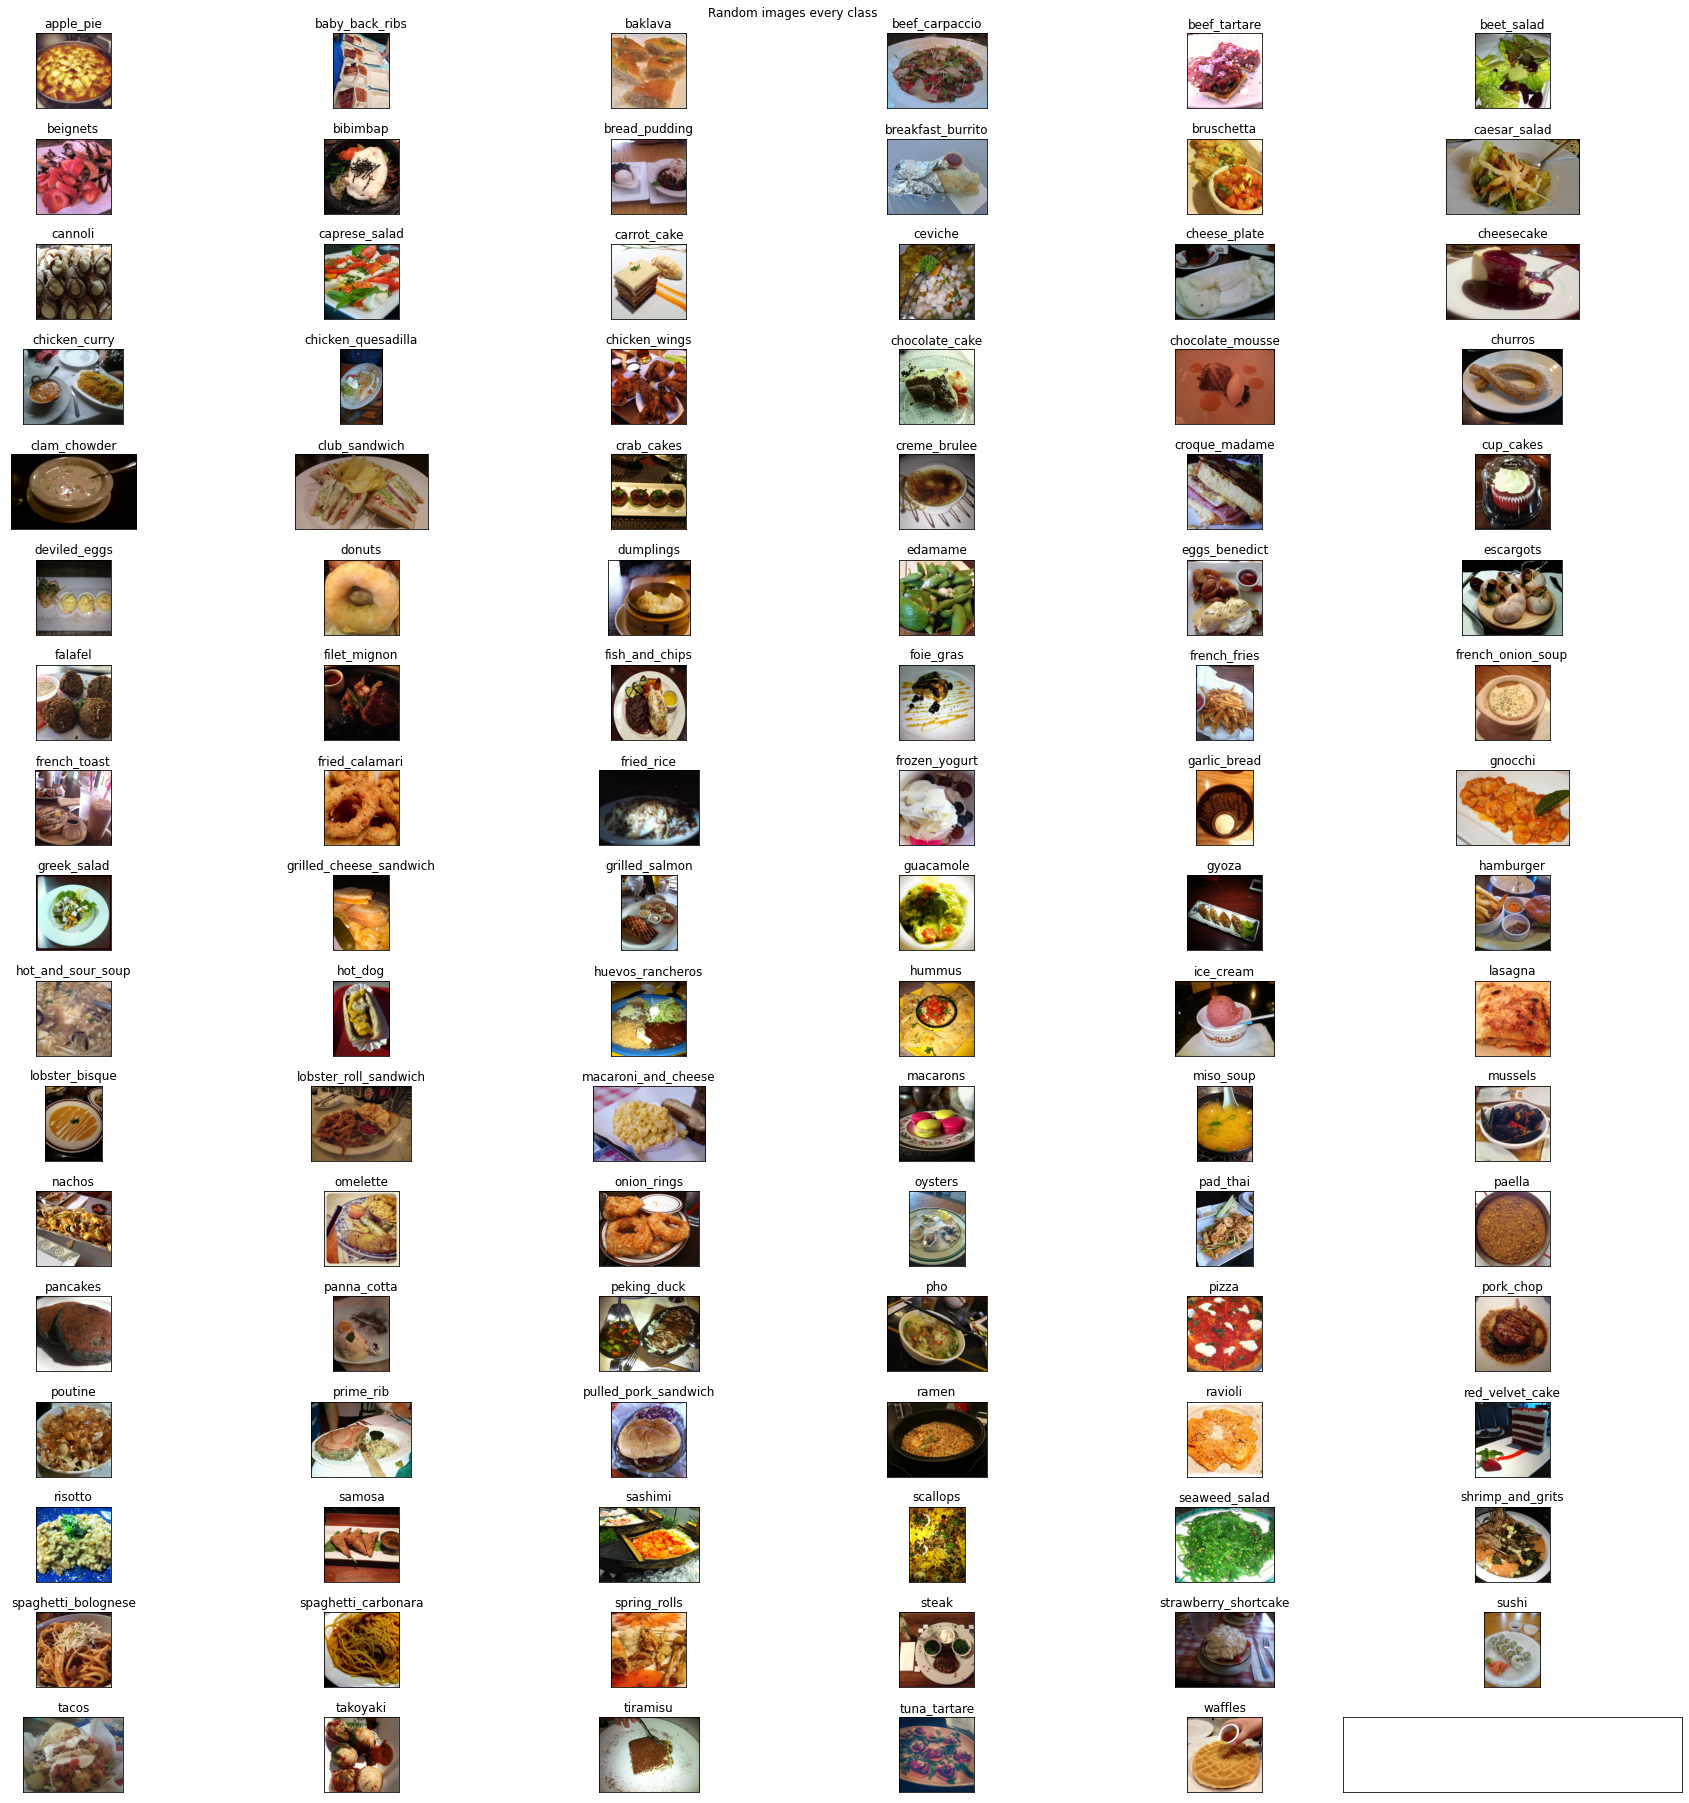

In [7]:
rows = 17
cols = 6
fig, ax = plt.subplots(rows,cols,figsize=(25,25))
fig.suptitle("Random images every class",y=1.0)
data_dir = img_dir_path
sorted_food = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
    for j in range(cols):
        try:
            selected_food = sorted_food[food_id]
            food_id += 1
        except:
            break
        selected_food_images = os.listdir(os.path.join(data_dir,selected_food))
        selected_food_random = np.random.choice(selected_food_images)

        img = plt.imread(os.path.join(data_dir,selected_food,selected_food_random))
        ax[i][j].imshow(img)
        ax[i][j].set_title(selected_food)
plt.setp(ax, xticks = [], yticks = [])
plt.tight_layout()

In [8]:
class_path = root_dir+'/meta/classes.txt'
train_img_path = root_dir+'/meta/train.txt'
test_img_path = root_dir+'/meta/test.txt'

In [9]:
def data_prep(path,src,dest):
    classes_images = defaultdict(list)
    with open(path,'r') as txt:
        paths = [read.strip() for read in txt.readlines()]
        for p in paths:
            food = p.split('/')
            classes_images[food[0]].append(food[1] + '.jpg')

    for food in classes_images.keys():
        print('Copying to: ',food)
        if not os.path.exists(os.path.join(dest,food)):
            os.makedirs(os.path.join(dest,food))
            for i in classes_images[food]:
                copy(os.path.join(src,food,i), os.path.join(dest,food,i))
        else:
            continue
    
    print("Done!")


In [10]:
print("Creating training data...")
data_prep(train_img_path,img_dir_path,'./train')

Creating training data...
Copying to:  apple_pie
Copying to:  baby_back_ribs
Copying to:  baklava
Copying to:  beef_carpaccio
Copying to:  beef_tartare
Copying to:  beet_salad
Copying to:  beignets
Copying to:  bibimbap
Copying to:  bread_pudding
Copying to:  breakfast_burrito
Copying to:  bruschetta
Copying to:  caesar_salad
Copying to:  cannoli
Copying to:  caprese_salad
Copying to:  carrot_cake
Copying to:  ceviche
Copying to:  cheesecake
Copying to:  cheese_plate
Copying to:  chicken_curry
Copying to:  chicken_quesadilla
Copying to:  chicken_wings
Copying to:  chocolate_cake
Copying to:  chocolate_mousse
Copying to:  churros
Copying to:  clam_chowder
Copying to:  club_sandwich
Copying to:  crab_cakes
Copying to:  creme_brulee
Copying to:  croque_madame
Copying to:  cup_cakes
Copying to:  deviled_eggs
Copying to:  donuts
Copying to:  dumplings
Copying to:  edamame
Copying to:  eggs_benedict
Copying to:  escargots
Copying to:  falafel
Copying to:  filet_mignon
Copying to:  fish_and_c

In [11]:
print("Creating testing data...")
data_prep(test_img_path,img_dir_path,'./test')

Creating testing data...
Copying to:  apple_pie
Copying to:  baby_back_ribs
Copying to:  baklava
Copying to:  beef_carpaccio
Copying to:  beef_tartare
Copying to:  beet_salad
Copying to:  beignets
Copying to:  bibimbap
Copying to:  bread_pudding
Copying to:  breakfast_burrito
Copying to:  bruschetta
Copying to:  caesar_salad
Copying to:  cannoli
Copying to:  caprese_salad
Copying to:  carrot_cake
Copying to:  ceviche
Copying to:  cheesecake
Copying to:  cheese_plate
Copying to:  chicken_curry
Copying to:  chicken_quesadilla
Copying to:  chicken_wings
Copying to:  chocolate_cake
Copying to:  chocolate_mousse
Copying to:  churros
Copying to:  clam_chowder
Copying to:  club_sandwich
Copying to:  crab_cakes
Copying to:  creme_brulee
Copying to:  croque_madame
Copying to:  cup_cakes
Copying to:  deviled_eggs
Copying to:  donuts
Copying to:  dumplings
Copying to:  edamame
Copying to:  eggs_benedict
Copying to:  escargots
Copying to:  falafel
Copying to:  filet_mignon
Copying to:  fish_and_ch

In [12]:
sorted_food

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [13]:
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout,Flatten 
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow import keras
from tensorflow.keras import models

In [14]:
def mini_dataset (food_list, src,dest):
  if os.path.exists(dest):
    rmtree(dest)
  os.makedirs(dest)
  for item in food_list:
    print("Copying images to: ",item)
    copytree(os.path.join(src,item),os.path.join(dest,item))

In [17]:
food_list = ['foie_gras','beef_carpaccio','bibimbap','donuts','tiramisu','tacos','waffles','ravioli']
src_train = 'train'
dest_train = 'mini_train'
src_test = 'test'
dest_test = 'mini_test'

In [18]:
print("Creating mini train data with new classes:")
mini_dataset(food_list,src_train,dest_train)

Creating mini train data with new classes:
Copying images to:  foie_gras
Copying images to:  beef_carpaccio
Copying images to:  bibimbap
Copying images to:  donuts
Copying images to:  tiramisu
Copying images to:  tacos
Copying images to:  waffles
Copying images to:  ravioli


In [19]:
print("Total number of samples in train folder")
!find mini_train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
6000


In [20]:
print("Creating mini validation data with new classes:")
mini_dataset(food_list,src_test,dest_test)

Creating mini validation data with new classes:
Copying images to:  foie_gras
Copying images to:  beef_carpaccio
Copying images to:  bibimbap
Copying images to:  donuts
Copying images to:  tiramisu
Copying images to:  tacos
Copying images to:  waffles
Copying images to:  ravioli


In [21]:
print("Total number of samples in test folder")
!find mini_test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
2000


In [22]:
print("Total Samples in Test folder: ")
!find test -type d -or -type f -printf '.' | wc -c

Total Samples in Test folder: 
25250


In [23]:
print("Total Samples in Train folder: ")
!find train -type d -or -type f -printf '.' | wc -c

Total Samples in Train folder: 
75750


In [37]:
n_classes = 8
img_height, img_width = 300,300
batch_size = 16
train_data_dir = 'mini_train'
validation_data_dir = 'mini_test'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    rotation_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6000 images belonging to 8 classes.
Found 2000 images belonging to 8 classes.


In [38]:
training_samples = 6000
validation_samples = 2000

In [45]:
resnet50 = ResNet50(include_top=False,weights='imagenet',input_tensor=None, input_shape=(img_height,img_width,3))
resnet50.trainable = True
model = Sequential([
    resnet50,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(n_classes,activation='softmax')
])
model.compile(optimizer= SGD(lr=0.001,momentum=0.9),loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 10, 10, 2048)      23587712  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 1032      
Total params: 23,851,016
Trainable params: 23,797,896
Non-trainable params: 53,120
_____________________________________

In [46]:
filepath = '/content/drive/MyDrive/Guise-Challenge/best_model_8_class.hdf5'

In [47]:
checkpointer = ModelCheckpoint(
    filepath=filepath, 
    monitor = 'loss',
    verbose = 1, 
    save_best_only = True
)

reduce_lr = ReduceLROnPlateau(
    monitor = 'val_acc',
    mode = 'max',
    min_delta = 0.01,
    patience = 3,
    factor = 0.25,
    verbose = 1,
    cooldown = 0,
    min_lr = 0.00000001
)

# Stop the training process when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
early_stopper = EarlyStopping(
    monitor = 'val_acc',
    mode = 'max',
    min_delta = 0.005,
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

In [48]:
model_save_path = '/content/drive/MyDrive/Food-101/TF_trained_8_class.hdf5'

In [49]:
#fit the model
history = model.fit(
    train_generator,
    steps_per_epoch = training_samples//batch_size,
    validation_data= validation_generator,
    validation_steps= validation_samples//batch_size,
    epochs=30,
    verbose=1,
    callbacks=[checkpointer,early_stopper,reduce_lr,checkpointer]
)
model.save(model_save_path)
print("Done")

Epoch 1/30
375/375 [==============================] - 326s 848ms/step - loss: 1.3952 - acc: 0.5073 - val_loss: 7.0737 - val_acc: 0.1240

Epoch 00001: loss improved from inf to 0.99395, saving model to /content/drive/MyDrive/Guise-Challenge/best_model_101_class.hdf5

Epoch 00001: loss did not improve from 0.99395
Epoch 2/30
375/375 [==============================] - 317s 845ms/step - loss: 0.5204 - acc: 0.8309 - val_loss: 1.2035 - val_acc: 0.5845

Epoch 00002: loss improved from 0.99395 to 0.48780, saving model to /content/drive/MyDrive/Guise-Challenge/best_model_101_class.hdf5

Epoch 00002: loss did not improve from 0.48780
Epoch 3/30
375/375 [==============================] - 317s 844ms/step - loss: 0.3845 - acc: 0.8778 - val_loss: 0.7428 - val_acc: 0.7645

Epoch 00003: loss improved from 0.48780 to 0.37482, saving model to /content/drive/MyDrive/Guise-Challenge/best_model_101_class.hdf5

Epoch 00003: loss did not improve from 0.37482
Epoch 4/30
375/375 [==============================

In [ ]:
new_model = load_model(filepath)
history2 = new_model.fit(
    train_generator,
    steps_per_epoch = 100,
    validation_data= validation_generator,
    validation_steps= 10,
    epochs=30,
    verbose=1,
    callbacks=[early_stopper, reduce_lr,checkpointer]
)

In [50]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
    
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

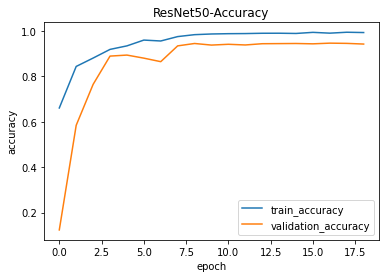

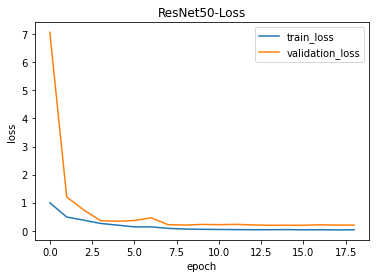

In [51]:
plot_accuracy(history,'ResNet50-Accuracy')
plot_loss(history,'ResNet50-Loss')